<a href="https://colab.research.google.com/github/deasafrydaptr/pospay_analysis/blob/main/Pospay_Research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install google-play-scraper

In [4]:
%%time
from google_play_scraper import app, Sort, reviews_all
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import matplotlib.pyplot as plt
import pickle
import ast
import re
from wordcloud import STOPWORDS
from wordcloud import WordCloud
from PIL import Image
from IPython.display import display
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

CPU times: user 775 ms, sys: 201 ms, total: 976 ms
Wall time: 1.46 s


# DATA SELECTION

In [ ]:
#Scraping data
app_id = 'com.posindonesia.giropos'
result = reviews_all(
    app_id,
    sleep_milliseconds=0,
    lang='id',
    sort=Sort.MOST_RELEVANT
)

In [ ]:
df = pd.DataFrame(np.array(result), columns=['review'])
df = pd.DataFrame(df.pop('review').tolist())

In [ ]:
display(df)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,9cfe4df6-dd83-4a50-8fbe-76f63cd63977,Saiful Ridiya,https://play-lh.googleusercontent.com/a/AEdFTp...,sistemnya selalu bermasalah tidak tahu ada nia...,1,82,2.10.7,2022-11-25 12:16:23,"Halo Saiful Ridiya, mohon maaf atas kendala ya...",2022-11-28 03:46:07
1,5549b925-d219-4bd5-b3d9-564665653b5d,Muhamad Hisam,https://play-lh.googleusercontent.com/a-/AD5-W...,Perbaiki sistem untuk membaca fhoto ktp...tolo...,1,465,2.10.4,2022-11-04 10:47:05,"Halo Muhamad Hisam, mohon maaf atas kendala ya...",2022-11-10 09:46:14
2,9eab0b76-6917-4eb1-be21-004741e72acd,Juwita Cabri,https://play-lh.googleusercontent.com/a/AEdFTp...,Setelah update mau login aja selalu bermasalah...,1,6,2.10.7,2022-12-13 05:51:06,None,NaT
3,ea01fe92-4af9-4667-8489-65fb183456b7,DariTanah&AkanKembaliKetanah MengapaBersipatLa...,https://play-lh.googleusercontent.com/a-/AD5-W...,"Maaf,, Aplikasinya seperti belum layak digunak...",1,143,2.10.4,2022-11-08 00:53:13,Halo DariTanah&AkanKembaliKetanah MengapaBersi...,2022-11-10 09:48:25
4,b25881cc-71e7-4caa-8a56-0aa1c654a113,Nurul Imams,https://play-lh.googleusercontent.com/a-/AD5-W...,"untuk UI aplikasi ini sdh sangat baik, fungsi ...",2,2,2.10.7,2022-12-06 22:16:56,None,NaT
...,...,...,...,...,...,...,...,...,...,...
13693,86cc4cb6-2e51-4b7e-a11b-d95562b228fc,Alfin Setiawan,https://play-lh.googleusercontent.com/a/AEdFTp...,👍👍👍👍👍,5,0,None,2021-03-23 04:24:42,None,NaT
13694,a088d58a-3034-45b1-9934-a17cedd3a121,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,👍👍👍👍👍,5,0,None,2019-12-02 13:43:31,"Hai Sobat Posgiro Mobile, terima kasih atas ke...",2019-12-03 02:41:35
13695,820ad7e3-41b1-476d-840e-35849103e548,nining eno,https://play-lh.googleusercontent.com/a/AEdFTp...,😎😎😎😎,5,0,None,2021-10-22 02:29:09,"\nHai Sobat Pospay, terima kasih atas kepercay...",2021-10-22 02:40:27
13696,aebe4698-c75a-4e87-9846-363aae946101,Sopian Jakla,https://play-lh.googleusercontent.com/a/AEdFTp...,👍👍👍👍👍👍👍,5,0,None,2022-11-10 05:11:43,"Halo Sopian Jakla, Terima kasih untuk rating d...",2022-11-10 06:47:03


In [ ]:
#Implementing proportionate stratified random sampling
df_sample = df.groupby('score', group_keys=False).apply(lambda x: x.sample(frac=0.1))
df_sample

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,94330358-4889-41db-ab8a-2467bee45ac0,Ilhamsyah,https://play-lh.googleusercontent.com/a-/AD5-W...,"Transaksi pending, dikomplen sudah 1 bulan bel...",1.0,0.0,2.10.0,2022-09-28 05:31:23,NaN,NaT
1,97b5326b-43ef-44c9-a4bf-ed87266ae9ce,Ros Linda,https://play-lh.googleusercontent.com/a-/AD5-W...,Semakin di upgrade semakin turun sih kualitasn...,1.0,1.0,2.1.9,2021-10-20 14:10:40,"Hai Sobat Pospay, Kami mohon maaf atas ketidak...",2021-10-21 02:17:01
2,3699ec11-bb90-4e57-a3ca-1a58f00ee1ea,Dadang Mulyana,https://play-lh.googleusercontent.com/a/AEdFTp...,Sudah d instal kok g bisa kebuka,1.0,0.0,1.11.0,2020-12-27 00:55:37,"Hai Sobat Posgiro Mobile, Kami mohon maaf atas...",2020-12-27 03:00:14
3,2478a429-2085-4157-9440-87301e42d43c,Taufik Rofi,https://play-lh.googleusercontent.com/a/AEdFTp...,Kok gak bisah di bukak pos giro nya iya ? pada...,1.0,0.0,1.11.0,2021-01-30 00:57:05,NaN,NaT
4,b5ff12aa-0ef6-416e-bb42-f675d30bc5ef,ari sandi,https://play-lh.googleusercontent.com/a/AEdFTp...,"Sekelas BUMN kantor pos, bikin app ko gini ama...",1.0,0.0,NaN,2021-06-17 13:20:06,"Hai Sobat Pospay, Kami mohon maaf atas ketidak...",2021-06-18 01:42:06
...,...,...,...,...,...,...,...,...,...,...
1365,22fd3f6e-7ace-41dd-9be9-1cc18b1c30d2,pujianto yhoo,https://play-lh.googleusercontent.com/a-/AD5-W...,"Terimakasih ,Cs fast respon jika ada kendala",5.0,0.0,NaN,2020-05-07 22:26:59,"Hai Sobat Posgiro Mobile, Kami mohon maaf atas...",2020-05-07 22:25:17
1366,0f25281b-05a5-4454-ae42-6e7ec0000c80,Intan tb,https://play-lh.googleusercontent.com/a/AEdFTp...,Lancar,5.0,0.0,NaN,2022-03-30 02:54:55,NaN,NaT
1367,af9e4629-6ced-429c-8aae-6fd550d57a1f,heru saputra,https://play-lh.googleusercontent.com/a/AEdFTp...,Bagus,5.0,0.0,2.10.4,2022-11-03 01:42:04,NaN,NaT
1368,e2ebf3bc-474b-4980-90cc-f307561d1cb7,Indra Permana,https://play-lh.googleusercontent.com/a-/AD5-W...,Layanan terbaik buat kantor pos terima kasih 🙏🙏🙏,5.0,0.0,2.10.4,2022-11-04 06:30:41,NaN,NaT


In [ ]:
#Export sample data for manual labelling
df_sample.to_excel("sample_pospay.xlsx")

# EXPLORE

In [28]:
#Import labeled sample data
df_pospay = pd.read_excel('drive/MyDrive/Pospay/sample_pospay.xlsx')

In [30]:
df_pospay.tail()

,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,label
1365,5570,22fd3f6e-7ace-41dd-9be9-1cc18b1c30d2,pujianto yhoo,https://play-lh.googleusercontent.com/a-/AD5-W...,"Terimakasih ,Cs fast respon jika ada kendala",5,0,NaN,2020-05-07 22:26:59,"Hai Sobat Posgiro Mobile, Kami mohon maaf atas...",2020-05-07 22:25:17,0
1366,13570,0f25281b-05a5-4454-ae42-6e7ec0000c80,Intan tb,https://play-lh.googleusercontent.com/a/AEdFTp...,Lancar,5,0,NaN,2022-03-30 02:54:55,NaN,NaT,0
1367,10572,af9e4629-6ced-429c-8aae-6fd550d57a1f,heru saputra,https://play-lh.googleusercontent.com/a/AEdFTp...,Bagus,5,0,2.10.4,2022-11-03 01:42:04,NaN,NaT,0
1368,2492,e2ebf3bc-474b-4980-90cc-f307561d1cb7,Indra Permana,https://play-lh.googleusercontent.com/a-/AD5-W...,Layanan terbaik buat kantor pos terima kasih 🙏🙏🙏,5,0,2.10.4,2022-11-04 06:30:41,NaN,NaT,0
1369,5546,6c588d5d-2333-463d-9fa4-c7516ad92b15,herdiansyah cucun,https://play-lh.googleusercontent.com/a/AEdFTp...,"Mantap, pos giro emang membantu dan berkualitas",5,0,NaN,2021-01-06 07:00:32,"Hai Sobat Posgiro Mobile, terima kasih atas ke...",2021-01-06 06:34:31,0


In [31]:
#Check missing value and data type
df_pospay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1370 entries, 0 to 1369
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            1370 non-null   int64         
 1   reviewId              1370 non-null   object        
 2   userName              1370 non-null   object        
 3   userImage             1370 non-null   object        
 4   content               1370 non-null   object        
 5   score                 1370 non-null   int64         
 6   thumbsUpCount         1370 non-null   int64         
 7   reviewCreatedVersion  1085 non-null   object        
 8   at                    1370 non-null   datetime64[ns]
 9   replyContent          794 non-null    object        
 10  repliedAt             794 non-null    datetime64[ns]
 11  label                 1370 non-null   int64         
dtypes: datetime64[ns](2), int64(4), object(6)
memory usage: 128.6+ KB


In [32]:
df_pospay.describe()

,Unnamed: 0,score,thumbsUpCount,label
count,1370.000000,1370.000000,1370.000000,1370.000000
mean,6844.361314,3.243066,0.573723,0.459124
std,3898.473336,1.873669,3.656853,0.498508
min,8.000000,1.000000,0.000000,0.000000
25%,3547.500000,1.000000,0.000000,0.000000
50%,6739.000000,4.500000,0.000000,0.000000
75%,10187.250000,5.000000,0.000000,1.000000
max,13693.000000,5.000000,87.000000,1.000000


In [33]:
# drop column
df_pospay.drop(columns=['Unnamed: 0'], inplace=True)

# VISUALIZE

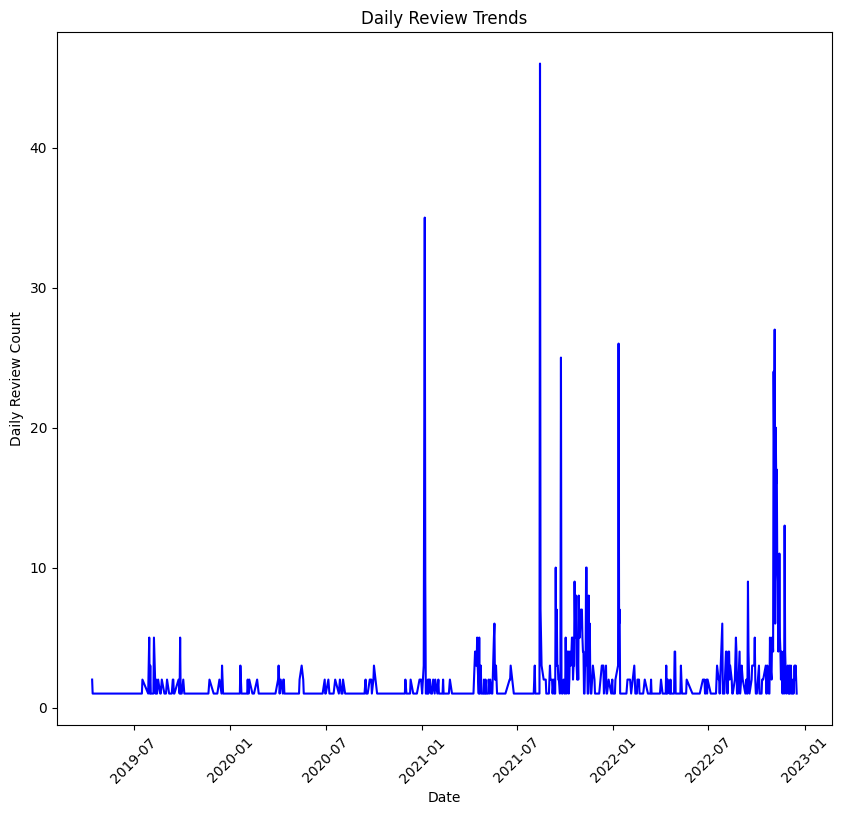

In [39]:
#Create line chart for daily review trends
plt.figure(figsize=(10, 9))
df_pospay['date'] = df_pospay['at'].dt.date
daily_review_counts = df_pospay['date'].value_counts().sort_index()
plt.plot(daily_review_counts.index, daily_review_counts.values, color='blue')
plt.title('Daily Review Trends')
plt.xlabel('Date')
plt.ylabel('Daily Review Count')
plt.xticks(rotation=45)
plt.show()

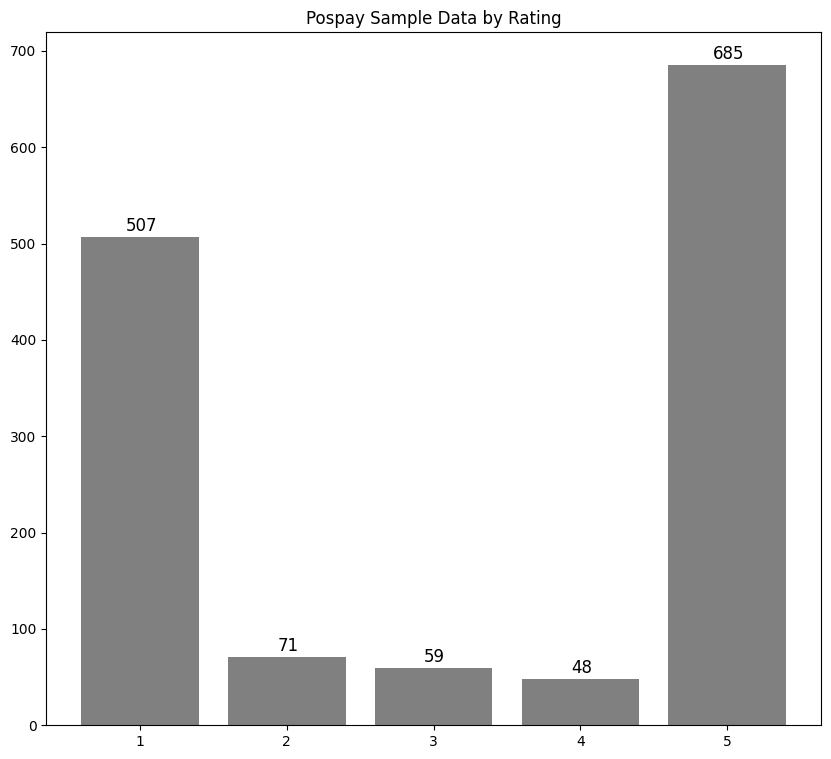

In [37]:
#Create bar chart data sample by rating
score_groups = df_pospay['score'].unique()
x = score_groups
y = df_pospay.groupby('score')['content'].count()
fig, ax =  plt.subplots(figsize = (10, 9))
ax.bar(x, y, color='grey')
for bar in ax.patches:
    ax.annotate(str(round(bar.get_height())), (bar.get_x(), bar.get_height())
                 ,ha='center',
                  va='center',
                  size=12,
                  xytext=(43, 8),
                  textcoords='offset points')
plt.title("Pospay Sample Data by Rating")
plt.ylim(bottom=0)
plt.show()

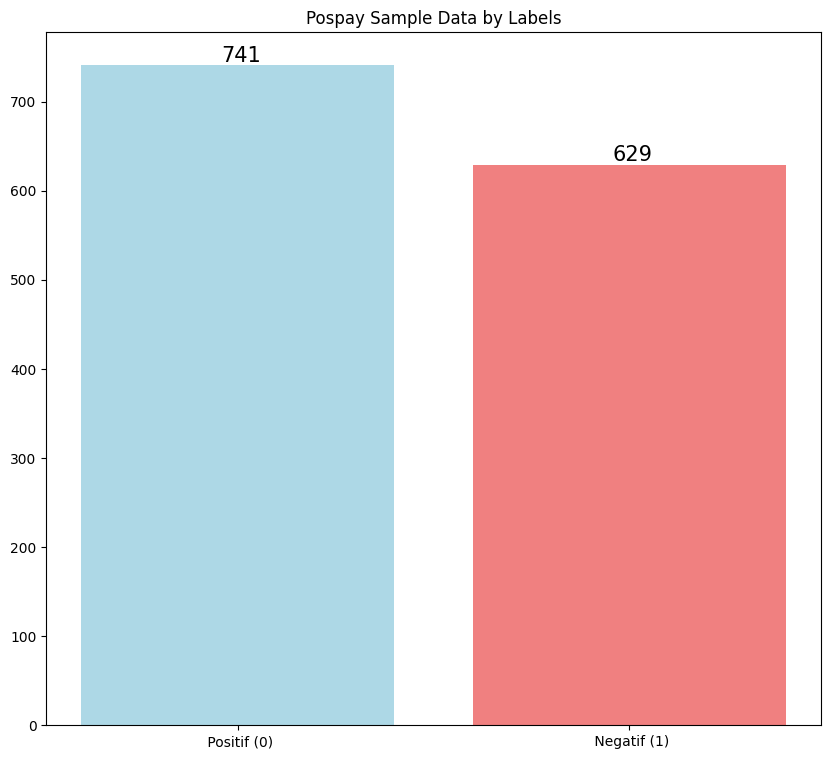

In [40]:
#Create bar chart data sample by label
x = [' Positif (0)' ,' Negatif (1)']
y = pd.value_counts(df_pospay['label'])
fig, ax =  plt.subplots(figsize = (10, 9))
ax.bar(x, y, color=('lightblue','lightcoral'))
for bar in ax.patches:
    ax.annotate(str(round(bar.get_height())), (bar.get_x(), bar.get_height())
                 ,ha='center',
                  va='center',
                  size=15,
                  xytext=(115, 7),
                  textcoords='offset points')
plt.title("Pospay Sample Data by Labels")
plt.ylim(bottom=0)
plt.show()

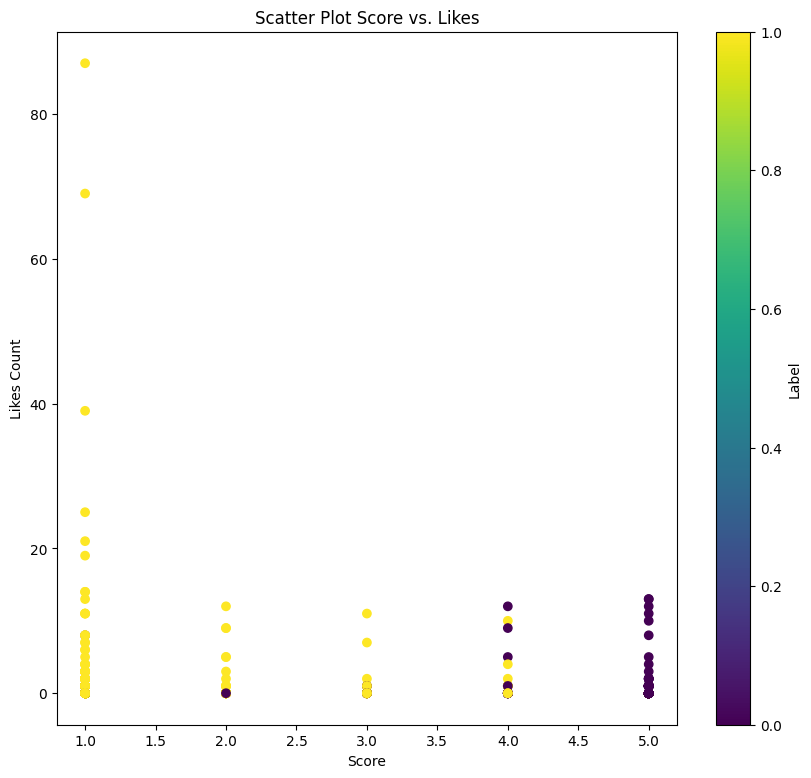

In [42]:
# Score vs Likes of reviews
plt.figure(figsize=(10, 9))
plt.scatter(df_pospay['score'], df_pospay['thumbsUpCount'], c=df_pospay['label'])
plt.title('Scatter Plot Score vs. Likes')
plt.xlabel('Score')
plt.ylabel('Likes Count')
plt.colorbar(label='Label')
plt.show()

In [43]:
df_pospay = df_pospay[['content','label']]
df_pospay

,content,label
0,"Transaksi pending, dikomplen sudah 1 bulan bel...",1
1,Semakin di upgrade semakin turun sih kualitasn...,1
2,Sudah d instal kok g bisa kebuka,1
3,Kok gak bisah di bukak pos giro nya iya ? pada...,1
4,"Sekelas BUMN kantor pos, bikin app ko gini ama...",1
...,...,...
1365,"Terimakasih ,Cs fast respon jika ada kendala",0
1366,Lancar,0
1367,Bagus,0
1368,Layanan terbaik buat kantor pos terima kasih 🙏🙏🙏,0


In [ ]:
#Export data selection final result
df_pospay.to_excel("dataSelection_finalRes.xlsx", index=False)

# PRE-PROCESSING

In [ ]:
#Import data selection final result
df_ppy = pd.read_excel('dataSelection_finalRes.xlsx')

Case Folding

In [ ]:
df_ppy.iloc[:,0] = df_ppy.iloc[:,0].str.lower()
df_ppy

,content,label
0,"transaksi pending, dikomplen sudah 1 bulan bel...",1
1,semakin di upgrade semakin turun sih kualitasn...,1
2,sudah d instal kok g bisa kebuka,1
3,kok gak bisah di bukak pos giro nya iya ? pada...,1
4,"sekelas bumn kantor pos, bikin app ko gini ama...",1
...,...,...
1365,"terimakasih ,cs fast respon jika ada kendala",0
1366,lancar,0
1367,bagus,0
1368,layanan terbaik buat kantor pos terima kasih 🙏🙏🙏,0


Cleaning

In [ ]:
!pip install emoji
import emoji
def extract_emojis(content):
    return ' '+emoji.demojize(content, language = 'indonesian')+' '
df_ppy.iloc[:,0] = df_ppy.iloc[:,0].apply(lambda x: extract_emojis(x))
df_ppy.iloc[:,0] = df_ppy.iloc[:,0].apply(lambda x: emoji.demojize(x))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
def cleaning(content, thePattern, z):
    content = " ".join(re.sub(thePattern, z, content).split())
    return content

In [ ]:
#remove ascii
df_ppy.iloc[:,0] = df_ppy.iloc[:,0].apply(lambda x:cleaning(x, r'[^\x00-\x7F]+', " "))
#remove symbols
df_ppy.iloc[:,0] = df_ppy.iloc[:,0].apply(lambda x:cleaning(x, r'(#@[A-Za-z0-9]+)|([^0-9A-Za-z\t])|(\w+:\/\/\S+)', " "))
#remove number
df_ppy.iloc[:,0] = df_ppy.iloc[:,0].apply(lambda x:cleaning(x, r'[0-9]+', " "))
#remove duplication of more than tree characters at time
df_ppy.iloc[:,0] = df_ppy.iloc[:,0].apply(lambda x:cleaning(x, r'([a-zA-Z])\1\1', "\\1"))
#remove double space or so
df_ppy.iloc[:,0] = df_ppy.iloc[:,0].apply(lambda x:cleaning(x, " +", " "))
#remove space in begin or end of text
df_ppy.iloc[:,0] = df_ppy.iloc[:,0].apply(lambda x:cleaning(x, "^[ ]|[ ]$",""))

In [ ]:
!pip install googletrans==3.1.0a0
from googletrans import Translator
translator = Translator()
df_ppy['content'] = df_ppy['content'].apply(translator.translate, src='en', dest='id').apply(getattr, args=('text',))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df_ppy

,content,label
0,transaksi pending dikomplen sudah bulan belum ...,1
1,semakin di upgrade semakin turun sih kualitasn...,1
2,sudah d instal kok g bisa dibuka,1
3,kok gak bisa di buka pos giro nya iya padahal ...,1
4,Sekelas bumn kantor pos bikin app ko gini amat...,1
...,...,...
1365,terimakasih cs fast respon jika ada kendala,0
1366,lancar,0
1367,bagus,0
1368,layanan terbaik buat kantor pos terima kasih t...,0


Tokenize

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
def word_tokenize_wrapper(text):
    return word_tokenize(text)

df_ppy['content'] = df_ppy['content'].apply(word_tokenize_wrapper)
df_ppy

,content,label
0,"[transaksi, pending, dikomplen, sudah, bulan, ...",1
1,"[semakin, di, upgrade, semakin, turun, sih, ku...",1
2,"[sudah, d, instal, kok, g, bisa, dibuka]",1
3,"[kok, gak, bisa, di, buka, pos, giro, nya, iya...",1
4,"[Sekelas, bumn, kantor, pos, bikin, app, ko, g...",1
...,...,...
1365,"[terimakasih, cs, fast, respon, jika, ada, ken...",0
1366,[lancar],0
1367,[bagus],0
1368,"[layanan, terbaik, buat, kantor, pos, terima, ...",0


Normalize

In [ ]:
# read norm dictionary
normalizad_word = pd.read_excel("norm.xlsx")
normalizad_word_dict = {}

#normalize process
for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1]

def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

#show result
df_ppy['content'] = df_ppy['content'].apply(normalized_term)
df_ppy

,content,label
0,"[transaksi, tertunda, dikomplain, sudah, bulan...",1
1,"[semakin, di, meningkatkan, semakin, turun, si...",1
2,"[sudah, di, install, kok, tidak, bisa, dibuka]",1
3,"[kok, tidak, bisa, di, buka, pos, giro, nya, i...",1
4,"[Sekelas, bumn, kantor, pos, buat, aplikasi, k...",1
...,...,...
1365,"[terima kasih, cs, cepat, tanggapan, jika, ada...",0
1366,[lancar],0
1367,[bagus],0
1368,"[layanan, terbaik, buat, kantor, pos, terima, ...",0


Filtering

In [ ]:
from nltk.corpus import stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# get dictionary
list_stopwords = stopwords.words('indonesian')
txt_stopword = open('stopwords.txt', 'r').read().split()

In [ ]:
# convert stopword string to list & append additional stopword
list_stopwords.extend(txt_stopword)

# convert list to dictionary
list_stopwords = set(list_stopwords)

# filter process
def stopword_removal(words):
    return [word for word in words if word not in list_stopwords]

df_ppy['content'] = df_ppy['content'].apply(stopword_removal)
df_ppy

,content,label
0,"[transaksi, tertunda, dikomplain, selesai, sel...",1
1,"[meningkatkan, turun, kualitasnya, kencang, me...",1
2,"[install, dibuka]",1
3,"[buka, pos, giro, pos, giro, membantu]",1
4,"[Sekelas, bumn, kantor, pos, aplikasi, daftar,...",1
...,...,...
1365,"[terima kasih, cepat, tanggapan, kendala]",0
1366,[lancar],0
1367,[bagus],0
1368,"[layanan, terbaik, kantor, pos, terima, kasih,...",0


Stemming

In [ ]:
#Stemming import Sastrawi package
!pip install swifter
!pip install Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [ ]:
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in df_ppy['content']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '

print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])

print(term_dict)
print("------------------------")

1363
------------------------
transaksi : transaksi
tertunda : tunda
dikomplain : komplain
selesai : selesai
meningkatkan : tingkat
turun : turun
kualitasnya : kualitas
kencang : kencang
menangis : menang
wajah : wajah
masuknya : masuk
saldo : saldo
minimum : minimum
lancar : lancar
jaya : jaya
install : install
dibuka : buka
buka : buka
pos : pos
giro : giro
membantu : bantu
Sekelas : kelas
bumn : bumn
kantor : kantor
aplikasi : aplikasi
daftar : daftar
masuk : masuk
parah : parah
banget : banget
buruk : buruk
beli : beli
pulsa : pulsa
rekening : rekening
diperbaiki : baik
isi : isi
tidak bisa : tidak bisa
tolong : tolong
dibenarkan : benar
kecewa : kecewa
dana : dana
top : top
up : up
kirim : kirim
akun : akun
busuk : busuk
ribu : ribu
uninstall : uninstall
hapus : hapus
data : data
nama : nama
meminjam : pinjam
lengkap : lengkap
datanya : data
suruh : suruh
awas : awas
tanggung : tanggung
penipu : tipu
topup : topup
pakai : pakai
bca : bca
virtual : virtual
setau : tau
dipotong : po

In [ ]:
# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

In [ ]:
df_ppy['content'] = df_ppy['content'].swifter.apply(get_stemmed_term)
df_ppy

Pandas Apply:   0%|          | 0/1370 [00:00<?, ?it/s]

,content,label
0,"[transaksi, tunda, komplain, selesai, selesai]",1
1,"[tingkat, turun, kualitas, kencang, menang, wa...",1
2,"[install, buka]",1
3,"[buka, pos, giro, pos, giro, bantu]",1
4,"[kelas, bumn, kantor, pos, aplikasi, daftar, m...",1
...,...,...
1365,"[terima kasih, cepat, tanggap, kendala]",0
1366,[lancar],0
1367,[bagus],0
1368,"[layan, baik, kantor, pos, terima, kasih, tang...",0


In [ ]:
#Export preprocessing final result
df_ppy.to_csv("sample_clean.csv",index=False)

In [ ]:
#Import preprocessing final result
df_pospayApp = pd.read_csv("sample_clean.csv")
df_pospayApp.head()

,Unnamed: 0,content,label
0,0,"['transaksi', 'tunda', 'komplain', 'selesai', ...",1.0
1,1,"['tingkat', 'turun', 'kualitas', 'kencang', 'm...",1.0
2,2,"['install', 'buka']",1.0
3,3,"['buka', 'pos', 'giro', 'pos', 'giro', 'bantu']",1.0
4,4,"['kelas', 'bumn', 'kantor', 'pos', 'aplikasi',...",1.0


In [ ]:
def join_text_list(texts):
    texts = ast.literal_eval(texts)
    return ' '.join([text for text in texts])

df_pospayApp['content_join'] = df_pospayApp['content'].apply(join_text_list)

In [ ]:
#remove blank content
df_pospayApp = df_pospayApp[df_pospayApp['content_join'] != '']
df_pospayApp

,Unnamed: 0,content,label,content_join
0,0,"['transaksi', 'tunda', 'komplain', 'selesai', ...",1.0,transaksi tunda komplain selesai selesai
1,1,"['tingkat', 'turun', 'kualitas', 'kencang', 'm...",1.0,tingkat turun kualitas kencang menang wajah ti...
2,2,"['install', 'buka']",1.0,install buka
3,3,"['buka', 'pos', 'giro', 'pos', 'giro', 'bantu']",1.0,buka pos giro pos giro bantu
4,4,"['kelas', 'bumn', 'kantor', 'pos', 'aplikasi',...",1.0,kelas bumn kantor pos aplikasi daftar masuk pa...
...,...,...,...,...
1365,1365,"['terima kasih', 'cepat', 'tanggap', 'kendala']",0.0,terima kasih cepat tanggap kendala
1366,1366,['lancar'],0.0,lancar
1367,1367,['bagus'],0.0,bagus
1368,1368,"['layan', 'baik', 'kantor', 'pos', 'terima', '...",0.0,layan baik kantor pos terima kasih tangan lipa...


In [ ]:
#TF - IDF process
vectorizer = TfidfVectorizer()

x_tfidf = vectorizer.fit_transform(df_pospayApp['content_join'])

In [ ]:
feature_names = vectorizer.get_feature_names_out()

In [ ]:
dense = x_tfidf.todense()
denselist = dense.tolist()
df_tfidf = pd.DataFrame(denselist, columns = feature_names)
df_tfidf

,abal,acara,acc,acung,ada,adil,administrator,adu,agen,ahli,...,wajah,wajib,wanita,warna,web,wesel,wifi,wni,xiaomi,yatim
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.232287,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1290,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1291,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1292,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1293,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_tfidf.to_csv('transformation_res.csv')

# MODELLING

In [ ]:
#set kernel and parameters
param_grid = {'C':[0.1, 0.25, 0.5, 0.75, 1, 1.1, 1.25, 1.5, 1.75],
              'gamma' : [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel' : ['linear', 'rbf', 'poly']}

In [ ]:
#operating grid search
grid = GridSearchCV(
    SVC(),
    param_grid = param_grid,
    refit=(True),
    verbose=3,
    n_jobs=-1
)

In [ ]:
#set scenario
scenario = [0.1, 0.2, 0.3]
#additional variables
no = 0
y_tests = []
y_predictions = []
new_svm_model = 0
X_test = 0
Y_test = 0
#looping process
for i in scenario:
    no += 1
    #split data
    x_train, x_test, y_train, y_test = train_test_split(x_tfidf, df_pospayApp['label'],
                                       test_size = i, random_state = 1)
    #implementing grid search
    grid.fit(x_train,y_train)
    #implementing svm algoritm
    svm_model = svm.SVC(**grid.best_params_)
    svm_model.fit(x_train, y_train)
    svm_model_score = svm_model.score(x_test, y_test)
    y_prediction = svm_model.predict(x_test)
    #export best model
    if svm_model_score > new_svm_model:
        new_svm_model = svm_model_score
        X_test = x_test
        Y_test = y_test
        filename = 'modelPospay.sav'
        pickle.dump(svm_model, open(filename, 'wb'))
    #make list for matrix params
    y_tests.append(y_test)
    y_predictions.append(y_prediction)
    #print result
    print("__________________________________________________________________\n")
    print("Scenario " + str(no))
    print("Train\t: ", (x_train.shape, y_train.shape),
          "\nTest\t: ", (x_test.shape, y_test.shape))
    print("Best Kernel & Parameters :")
    print(grid.best_params_)
    print('Akurasi Model : ')
    print(svm_model_score)
    print("__________________________________________________________________\n")

Fitting 5 folds for each of 135 candidates, totalling 675 fits
__________________________________________________________________

Scenario 1
Train	:  ((1165, 969), (1165,)) 
Test	:  ((130, 969), (130,))
Best Kernel & Parameters :
{'C': 1, 'gamma': 1, 'kernel': 'rbf'}
Akurasi Model : 
0.9538461538461539
_________________________________________

Fitting 5 folds for each of 135 candidates, totalling 675 fits
__________________________________________________________________

Scenario 2
Train	:  ((1036, 969), (1036,)) 
Test	:  ((259, 969), (259,))
Best Kernel & Parameters :
{'C': 1.25, 'gamma': 1, 'kernel': 'linear'}
Akurasi Model : 
0.915057915057915
_________________________________________

Fitting 5 folds for each of 135 candidates, totalling 675 fits
__________________________________________________________________

Scenario 3
Train	:  ((906, 969), (906,)) 
Test	:  ((389, 969), (389,))
Best Kernel & Parameters :
{'C': 1, 'gamma': 1, 'kernel': 'linear'}
Akurasi Model : 
0.8946015424

# EVALUATION


Skenario 1



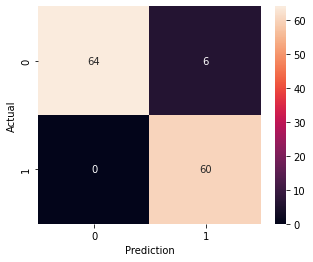

_______________________________________________________

              precision    recall  f1-score   support

         0.0       1.00      0.91      0.96        70
         1.0       0.91      1.00      0.95        60

    accuracy                           0.95       130
   macro avg       0.95      0.96      0.95       130
weighted avg       0.96      0.95      0.95       130

_______________________________________________________

Accuracy	:  0.9538461538461539
Precision	:  0.9090909090909091
Recall		:  1.0
F1-Score	:  0.9523809523809523



Skenario 2



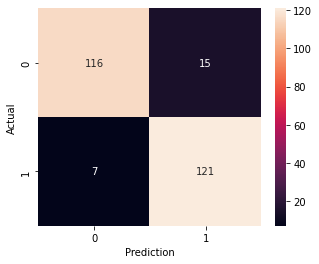

_______________________________________________________

              precision    recall  f1-score   support

         0.0       0.94      0.89      0.91       131
         1.0       0.89      0.95      0.92       128

    accuracy                           0.92       259
   macro avg       0.92      0.92      0.92       259
weighted avg       0.92      0.92      0.92       259

_______________________________________________________

Accuracy	:  0.915057915057915
Precision	:  0.8897058823529411
Recall		:  0.9453125
F1-Score	:  0.9166666666666666



Skenario 3



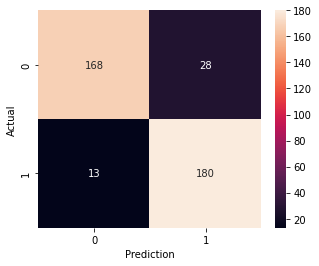

_______________________________________________________

              precision    recall  f1-score   support

         0.0       0.93      0.86      0.89       196
         1.0       0.87      0.93      0.90       193

    accuracy                           0.89       389
   macro avg       0.90      0.89      0.89       389
weighted avg       0.90      0.89      0.89       389

_______________________________________________________

Accuracy	:  0.8946015424164524
Precision	:  0.8653846153846154
Recall		:  0.9326424870466321
F1-Score	:  0.8977556109725686




In [ ]:
#Confusion Matrix
no = 0
for yt, yp in zip (y_tests,y_predictions):
    no += 1
    f, ax = plt.subplots(figsize=(5,4))
    sns.heatmap(confusion_matrix(yt, yp), annot=True, fmt=".0f", ax=ax)
    plt.xlabel("Prediction")
    plt.ylabel("Actual")
    print("\nSkenario "+str(no)+"\n")
    plt.show()
    print("_______________________________________________________\n")
    print(classification_report(yt, yp, zero_division = 0, digits = 2))
    print("_______________________________________________________")
    print("\nAccuracy\t: ", accuracy_score(yt, yp))
    print("Precision\t: ", precision_score(yt, yp))
    print("Recall\t\t: ", recall_score(yt, yp))
    print("F1-Score\t: ", f1_score(yt, yp))
    print("\n===================================================\n")

In [ ]:
#Load saved model and test it (again)
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)

0.9538461538461539


# WORDCLOUD

In [ ]:
def similar_color_func(word=None, font_size=None,
                       position=None, orientation=None,
                       font_path=None, random_state=None):
    h = 40 # 0 - 360
    s = 100 # 0 - 100
    l = random_state.randint(30, 70) # 0 - 100
    return "hsl({}, {}%, {}%)".format(h, s, l)

In [ ]:
mask = np.array(Image.open('gp.png'))

In [ ]:
positif = df_pospayApp[df_pospayApp['label'] == 0]
positifWords = ' '.join([contents for contents in positif['content_join']])
positifWords

'bantu tolong tambah metode isi saldo bank bri mandiri bni usaha bumn bank bri bri bumn terima kasih rating gelandang ganti password up password mudah tebak aplikasi mantap baik gopay bintang aplikasi bantu aplikasi bagus bintang bicara kasih bintang ikut terima kasih suka aplikasi mantap rekreasi coba tingkat paket bulan telkomsel aplikasi bagus sayang saldo aplikasi bantu manfaat install sungguh unduh gara gara sosialisasi sekolah baik dana mudah aplikasi keren administrator dagang daring bayar tempat buka pospay pakai aplikasi unduh malaikat aplikasi pos giro biaya bagus lumayan lupa guna bantu bagus biasa aplikasi terima bayar paket bayar tempat kantor pos bayar ongkir manfaat aplikasi uang digital tingkat lupa nama guna sandi aplikasi bagus banget senyum wajah senyum wajah lumayan kode referal akun aplikasi kirim uang negeri bagus bangkit aplikasi bagus password masuk simpan otomatis paksa pakai sidik jari masuk masuk aplikasi lumayan bagus kantor pos langsung aplikasi data lewat 

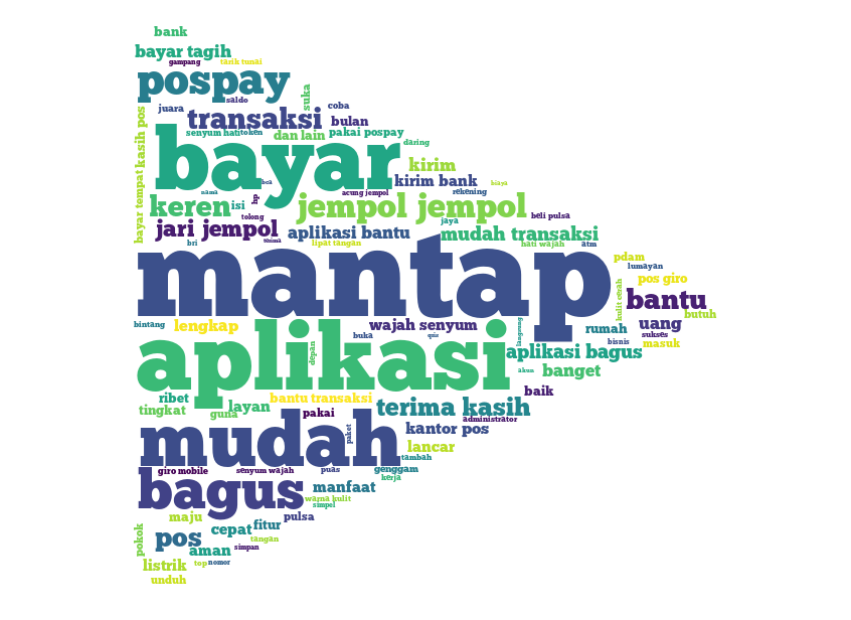

In [ ]:
wc = WordCloud(stopwords=STOPWORDS, font_path='chunk.otf',
               mask=mask, background_color="white",
               max_words=100, max_font_size=256,
               random_state=42, width=mask.shape[1],
               height=mask.shape[0])
wc.generate(positifWords)
plt.figure(figsize=(15, 15))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
negative = df_pospayApp[df_pospayApp['label'] == 1]
negativeWords = ' '.join([contents for contents in negative['content_join']])
negativeWords

'transaksi tunda komplain selesai selesai tingkat turun kualitas kencang menang wajah tingkat masuk saldo minimum transaksi lancar jaya install buka buka pos giro pos giro bantu kelas bumn kantor pos aplikasi daftar masuk parah banget aplikasi buruk beli pulsa saldo saldo rekening baik isi pulsa tidak bisa tolong benar pos kecewa dana top up kirim masuk akun giro pos dana aplikasi busuk saldo ribu uninstall aplikasi tolong hapus data nama pinjam lengkap data isi suruh aplikasi pinjam awas tanggung aplikasi tipu topup pakai bca virtual tau potong potong transaksi alhasil saldo bayar pdam buka aplikasi masuk uninstall buka masuk pospay baik aplikasi cair bsu aplikasi bobrok aplikasi muat foto ktp tanggap saldo sisa ribu beli pulsa ribu aneh unduh komentar negatif buruk baru lihat rating jelek jelek tolong baik libur jam kerja kesan lambat orang sistem daring kali verifikasi akun muncul muncul beri tahu surel verifikasi liteplus verifikasi fungsi aplikasi coba kali baru lite plus gagal tu

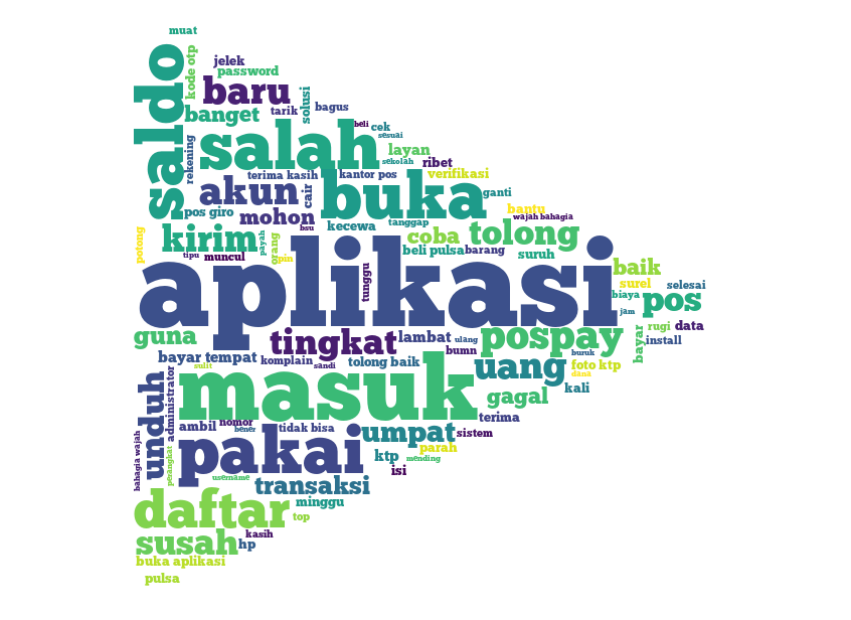

In [ ]:
wc = WordCloud(stopwords=STOPWORDS, font_path='chunk.otf',
               mask=mask, background_color="white",
               max_words=100, max_font_size=256,
               random_state=42, width=mask.shape[1],
               height=mask.shape[0])
wc.generate(negativeWords)
plt.figure(figsize=(15, 15))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()